In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import scanpy as sc
from STAMapper import pipeline, pp, pl
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import STAMapper
import warnings
warnings.filterwarnings("ignore")

In [2]:
key_class1 = 'celltype'
key_class2 = 'celltype'
key_classes = [key_class1, key_class2]

## load data

In [3]:
adata_sc = sc.read_h5ad(r'../data/hypothalamic_sc.h5ad')
adata_sc = adata_sc[~adata_sc.obs['celltype'].isin(['Astrocytes'])]#remove astrocytes
adata_sp = sc.read_h5ad(r'../data/MERFISH_hypothalamic_15.h5ad') 
adata_sp.obs['celltype'].replace('Astrocytes','unknown',inplace=True)

sc_name = 'hypothalamic_sc_rf_astrocyte'
sp_name = 'hypothalamic_MERFISH'

## Training

In [4]:
adatas = [adata_sc, adata_sp]
dsnames = (sc_name, sp_name)#change dsnames for a new training task

outputs = pipeline.training(adatas=adatas, num=1, dsnames=dsnames, key_classes=key_classes)

Data Preprocessing!
[leiden] Time used:  160.2591 s
a new directory made:
	_temp\('hypothalamic_sc_rf_astrocyte', 'hypothalamic_MERFISH')\0\figs
already exists:
	_temp\('hypothalamic_sc_rf_astrocyte', 'hypothalamic_MERFISH')\0
[*] Setting dataset names:
	0-->hypothalamic_sc_rf_astrocyte
	1-->hypothalamic_MERFISH
[*] Setting aligned features for observation nodes (self._features)
[*] Setting observation-by-variable adjacent matrices (`self._ov_adjs`) for making merged graph adjacent matrix of observation and variable nodes
-------------------- Summary of the DGL-Heterograph --------------------
Graph(num_nodes={'cell': 48099, 'gene': 154},
      num_edges={('cell', 'express', 'gene'): 1439462, ('cell', 'self_loop_cell', 'cell'): 48099, ('cell', 'similar_to', 'cell'): 310678, ('gene', 'expressed_by', 'cell'): 1439462, ('gene', 'self_loop_gene', 'gene'): 154},
      metagraph=[('cell', 'gene', 'express'), ('cell', 'cell', 'self_loop_cell'), ('cell', 'cell', 'similar_to'), ('gene', 'cell',

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.17it/s]


Epoch 0000 | Train Acc: 0.4545 | Test: 0.3909 (max=0.3909) | AMI=0.0678 | Time: 2.4755


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.96it/s]


Epoch 0003 | Train Acc: 0.7276 | Test: 0.4492 (max=0.4492) | AMI=0.1593 | Time: 1.1675


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.82it/s]


Epoch 0006 | Train Acc: 0.7345 | Test: 0.4921 (max=0.4927) | AMI=0.2377 | Time: 0.9840


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.88it/s]


Epoch 0009 | Train Acc: 0.7863 | Test: 0.5216 (max=0.5605) | AMI=0.3244 | Time: 0.9132


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.65it/s]


Epoch 0012 | Train Acc: 0.8299 | Test: 0.5436 (max=0.5605) | AMI=0.3719 | Time: 0.8981


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.22it/s]


Epoch 0015 | Train Acc: 0.7486 | Test: 0.5711 (max=0.6324) | AMI=0.3491 | Time: 0.8715


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.03it/s]


Epoch 0018 | Train Acc: 0.8828 | Test: 0.4146 (max=0.6324) | AMI=0.4024 | Time: 0.8555


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.28it/s]


Epoch 0021 | Train Acc: 0.8828 | Test: 0.4535 (max=0.6324) | AMI=0.4492 | Time: 0.8439


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.76it/s]


Epoch 0024 | Train Acc: 0.8866 | Test: 0.6663 (max=0.6663) | AMI=0.4531 | Time: 0.8433


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.65it/s]


Epoch 0027 | Train Acc: 0.9154 | Test: 0.5663 (max=0.6663) | AMI=0.3939 | Time: 0.8342


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.27it/s]


Epoch 0030 | Train Acc: 0.9389 | Test: 0.6775 (max=0.6775) | AMI=0.4873 | Time: 0.8270


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.01it/s]


Epoch 0033 | Train Acc: 0.9505 | Test: 0.5853 (max=0.6838) | AMI=0.4220 | Time: 0.8279


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.93it/s]


Epoch 0036 | Train Acc: 0.9595 | Test: 0.6846 (max=0.6846) | AMI=0.4716 | Time: 0.8223


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.55it/s]


Epoch 0039 | Train Acc: 0.9621 | Test: 0.6313 (max=0.6933) | AMI=0.4331 | Time: 0.8182


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.28it/s]


Epoch 0042 | Train Acc: 0.9608 | Test: 0.7413 (max=0.7413) | AMI=0.5252 | Time: 0.8154


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.60it/s]


Epoch 0045 | Train Acc: 0.9665 | Test: 0.7395 (max=0.7413) | AMI=0.5253 | Time: 0.8128


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.88it/s]


Epoch 0048 | Train Acc: 0.9715 | Test: 0.7241 (max=0.7413) | AMI=0.5143 | Time: 0.8151


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.81it/s]


Epoch 0051 | Train Acc: 0.9721 | Test: 0.6915 (max=0.7413) | AMI=0.4778 | Time: 0.8129


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.47it/s]


Epoch 0054 | Train Acc: 0.9716 | Test: 0.7250 (max=0.7413) | AMI=0.5117 | Time: 0.8060


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.60it/s]


Epoch 0057 | Train Acc: 0.9755 | Test: 0.7362 (max=0.7413) | AMI=0.5293 | Time: 0.8023


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.97it/s]


Epoch 0060 | Train Acc: 0.9755 | Test: 0.7342 (max=0.7433) | AMI=0.5127 | Time: 0.8047


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.40it/s]


Epoch 0063 | Train Acc: 0.9778 | Test: 0.7343 (max=0.7433) | AMI=0.5549 | Time: 0.8026


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.15it/s]


Epoch 0066 | Train Acc: 0.9780 | Test: 0.7243 (max=0.7433) | AMI=0.5063 | Time: 0.8017


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.56it/s]


Epoch 0069 | Train Acc: 0.9792 | Test: 0.7424 (max=0.7433) | AMI=0.5408 | Time: 0.8000


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.84it/s]


Epoch 0072 | Train Acc: 0.9773 | Test: 0.7186 (max=0.7516) | AMI=0.5130 | Time: 0.8014


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.91it/s]


Epoch 0075 | Train Acc: 0.9811 | Test: 0.7497 (max=0.7516) | AMI=0.5831 | Time: 0.7995


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.62it/s]


Epoch 0078 | Train Acc: 0.9798 | Test: 0.7446 (max=0.7516) | AMI=0.5457 | Time: 0.7980


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.24it/s]


Epoch 0081 | Train Acc: 0.9813 | Test: 0.7364 (max=0.7516) | AMI=0.5243 | Time: 0.7966


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.96it/s]


Epoch 0084 | Train Acc: 0.9815 | Test: 0.7398 (max=0.7516) | AMI=0.5669 | Time: 0.7979


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.49it/s]


Epoch 0087 | Train Acc: 0.9830 | Test: 0.7401 (max=0.7516) | AMI=0.5404 | Time: 0.7969


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.47it/s]


Epoch 0090 | Train Acc: 0.9831 | Test: 0.7559 (max=0.7577) | AMI=0.5460 | Time: 0.7956


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.63it/s]


Epoch 0093 | Train Acc: 0.9847 | Test: 0.7360 (max=0.7577) | AMI=0.5292 | Time: 0.7946


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.06it/s]


Epoch 0096 | Train Acc: 0.9856 | Test: 0.7547 (max=0.7577) | AMI=0.5919 | Time: 0.7933


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.52it/s]


[current best] model weights backup
Epoch 0099 | Train Acc: 0.9872 | Test: 0.7435 (max=0.7577) | AMI=0.5635 | Time: 0.7947


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.68it/s]


[current best] model weights backup
Epoch 0100 | Train Acc: 0.9862 | Test: 0.7569 (max=0.7577) | AMI=0.6098 | Time: 0.7944


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.49it/s]


Epoch 0102 | Train Acc: 0.9859 | Test: 0.7536 (max=0.7577) | AMI=0.5681 | Time: 0.7933


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.80it/s]


[current best] model weights backup
Epoch 0104 | Train Acc: 0.9873 | Test: 0.7547 (max=0.7577) | AMI=0.6113 | Time: 0.7927


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.67it/s]


Epoch 0105 | Train Acc: 0.9869 | Test: 0.7563 (max=0.7577) | AMI=0.5587 | Time: 0.7923


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.36it/s]


[current best] model weights backup
Epoch 0108 | Train Acc: 0.9865 | Test: 0.7523 (max=0.7577) | AMI=0.6305 | Time: 0.7938


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.13it/s]


Epoch 0111 | Train Acc: 0.9878 | Test: 0.7416 (max=0.7577) | AMI=0.5475 | Time: 0.7929


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.49it/s]


Epoch 0114 | Train Acc: 0.9877 | Test: 0.7553 (max=0.7612) | AMI=0.5981 | Time: 0.7923


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.28it/s]


Epoch 0117 | Train Acc: 0.9886 | Test: 0.7577 (max=0.7643) | AMI=0.5848 | Time: 0.7915


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.52it/s]


Epoch 0120 | Train Acc: 0.9890 | Test: 0.7475 (max=0.7643) | AMI=0.5591 | Time: 0.7908


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.28it/s]


Epoch 0123 | Train Acc: 0.9894 | Test: 0.7603 (max=0.7643) | AMI=0.5742 | Time: 0.7921


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.72it/s]


Epoch 0126 | Train Acc: 0.9896 | Test: 0.7495 (max=0.7643) | AMI=0.5711 | Time: 0.7915


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.60it/s]


Epoch 0129 | Train Acc: 0.9903 | Test: 0.7547 (max=0.7643) | AMI=0.5758 | Time: 0.7908


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.92it/s]


Epoch 0132 | Train Acc: 0.9912 | Test: 0.7578 (max=0.7643) | AMI=0.5767 | Time: 0.7901


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.49it/s]


Epoch 0135 | Train Acc: 0.9915 | Test: 0.7442 (max=0.7643) | AMI=0.5954 | Time: 0.7911


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.28it/s]


Epoch 0138 | Train Acc: 0.9906 | Test: 0.7543 (max=0.7643) | AMI=0.5720 | Time: 0.7905


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.08it/s]


Epoch 0141 | Train Acc: 0.9909 | Test: 0.7536 (max=0.7643) | AMI=0.5680 | Time: 0.7901


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.72it/s]


Epoch 0144 | Train Acc: 0.9906 | Test: 0.7493 (max=0.7643) | AMI=0.5973 | Time: 0.7897


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.36it/s]


Epoch 0147 | Train Acc: 0.9924 | Test: 0.7638 (max=0.7643) | AMI=0.6109 | Time: 0.7906


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.72it/s]


Epoch 0150 | Train Acc: 0.9925 | Test: 0.7590 (max=0.7643) | AMI=0.5960 | Time: 0.7901


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.58it/s]


Epoch 0153 | Train Acc: 0.9914 | Test: 0.7455 (max=0.7643) | AMI=0.5827 | Time: 0.7895


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.91it/s]


Epoch 0156 | Train Acc: 0.9925 | Test: 0.7568 (max=0.7643) | AMI=0.5831 | Time: 0.7889


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.76it/s]


Epoch 0159 | Train Acc: 0.9926 | Test: 0.7469 (max=0.7643) | AMI=0.6183 | Time: 0.7882


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.50it/s]


[current best] model weights backup
Epoch 0161 | Train Acc: 0.9929 | Test: 0.7572 (max=0.7643) | AMI=0.6351 | Time: 0.7893


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.57it/s]


Epoch 0162 | Train Acc: 0.9936 | Test: 0.7588 (max=0.7643) | AMI=0.5860 | Time: 0.7892


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.64it/s]


Epoch 0165 | Train Acc: 0.9930 | Test: 0.7455 (max=0.7643) | AMI=0.6188 | Time: 0.7888


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.32it/s]


Epoch 0168 | Train Acc: 0.9930 | Test: 0.7528 (max=0.7643) | AMI=0.5726 | Time: 0.7884


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.76it/s]


Epoch 0171 | Train Acc: 0.9932 | Test: 0.7487 (max=0.7643) | AMI=0.5805 | Time: 0.7878


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.13it/s]


Epoch 0174 | Train Acc: 0.9926 | Test: 0.7553 (max=0.7643) | AMI=0.6107 | Time: 0.7887


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.20it/s]


Epoch 0177 | Train Acc: 0.9926 | Test: 0.7582 (max=0.7643) | AMI=0.6266 | Time: 0.7882


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.68it/s]


Epoch 0180 | Train Acc: 0.9933 | Test: 0.7580 (max=0.7643) | AMI=0.5764 | Time: 0.7877


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.73it/s]


Epoch 0183 | Train Acc: 0.9938 | Test: 0.7479 (max=0.7643) | AMI=0.5877 | Time: 0.7873


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.52it/s]


Epoch 0186 | Train Acc: 0.9935 | Test: 0.7586 (max=0.7643) | AMI=0.5828 | Time: 0.7882


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.98it/s]


[current best] model weights backup
Epoch 0187 | Train Acc: 0.9932 | Test: 0.7541 (max=0.7643) | AMI=0.6369 | Time: 0.7882


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.92it/s]


[current best] model weights backup
Epoch 0189 | Train Acc: 0.9931 | Test: 0.7633 (max=0.7643) | AMI=0.6370 | Time: 0.7879


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.80it/s]


Epoch 0192 | Train Acc: 0.9941 | Test: 0.7606 (max=0.7643) | AMI=0.5934 | Time: 0.7875


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.39it/s]


Epoch 0195 | Train Acc: 0.9931 | Test: 0.7570 (max=0.7643) | AMI=0.6213 | Time: 0.7871


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.69it/s]


[current best] model weights backup
Epoch 0198 | Train Acc: 0.9926 | Test: 0.7603 (max=0.7643) | AMI=0.6389 | Time: 0.7867


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.72it/s]


[current best] model weights backup
Epoch 0201 | Train Acc: 0.9939 | Test: 0.7546 (max=0.7643) | AMI=0.6484 | Time: 0.7874


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.19it/s]


Epoch 0204 | Train Acc: 0.9937 | Test: 0.7604 (max=0.7643) | AMI=0.6323 | Time: 0.7871


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.40it/s]


Epoch 0207 | Train Acc: 0.9940 | Test: 0.7533 (max=0.7643) | AMI=0.6284 | Time: 0.7868


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.76it/s]


Epoch 0210 | Train Acc: 0.9945 | Test: 0.7565 (max=0.7643) | AMI=0.5935 | Time: 0.7865


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.75it/s]


Epoch 0213 | Train Acc: 0.9939 | Test: 0.7537 (max=0.7643) | AMI=0.5781 | Time: 0.7871


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.51it/s]


Epoch 0216 | Train Acc: 0.9946 | Test: 0.7528 (max=0.7643) | AMI=0.5810 | Time: 0.7868


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.20it/s]


Epoch 0219 | Train Acc: 0.9942 | Test: 0.7645 (max=0.7646) | AMI=0.6146 | Time: 0.7866


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.47it/s]


Epoch 0222 | Train Acc: 0.9941 | Test: 0.7591 (max=0.7650) | AMI=0.6208 | Time: 0.7864


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.84it/s]


Epoch 0225 | Train Acc: 0.9929 | Test: 0.7604 (max=0.7650) | AMI=0.6183 | Time: 0.7871


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.87it/s]


Epoch 0228 | Train Acc: 0.9937 | Test: 0.7575 (max=0.7650) | AMI=0.6040 | Time: 0.7866


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.01it/s]


Epoch 0231 | Train Acc: 0.9933 | Test: 0.7460 (max=0.7650) | AMI=0.5921 | Time: 0.7863


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.63it/s]


Epoch 0234 | Train Acc: 0.9936 | Test: 0.7562 (max=0.7650) | AMI=0.5949 | Time: 0.7860


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.36it/s]


Epoch 0237 | Train Acc: 0.9944 | Test: 0.7584 (max=0.7650) | AMI=0.6307 | Time: 0.7867


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.20it/s]


Epoch 0240 | Train Acc: 0.9935 | Test: 0.7568 (max=0.7650) | AMI=0.6026 | Time: 0.7863


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.32it/s]


Epoch 0243 | Train Acc: 0.9943 | Test: 0.7544 (max=0.7650) | AMI=0.6058 | Time: 0.7860


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.17it/s]


[current best] model weights backup
Epoch 0244 | Train Acc: 0.9940 | Test: 0.7580 (max=0.7650) | AMI=0.6521 | Time: 0.7857


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.97it/s]


Epoch 0246 | Train Acc: 0.9946 | Test: 0.7550 (max=0.7650) | AMI=0.5975 | Time: 0.7849


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.81it/s]


Epoch 0249 | Train Acc: 0.9945 | Test: 0.7595 (max=0.7650) | AMI=0.6054 | Time: 0.7837


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.97it/s]


Epoch 0252 | Train Acc: 0.9945 | Test: 0.7617 (max=0.7650) | AMI=0.6311 | Time: 0.7833


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.97it/s]


Epoch 0255 | Train Acc: 0.9946 | Test: 0.7522 (max=0.7650) | AMI=0.5906 | Time: 0.7820


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.01it/s]


Epoch 0258 | Train Acc: 0.9936 | Test: 0.7494 (max=0.7650) | AMI=0.6134 | Time: 0.7819


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.37it/s]


Epoch 0261 | Train Acc: 0.9940 | Test: 0.7538 (max=0.7650) | AMI=0.6113 | Time: 0.7816


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.06it/s]


Epoch 0264 | Train Acc: 0.9938 | Test: 0.7592 (max=0.7650) | AMI=0.6254 | Time: 0.7814


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.83it/s]


Epoch 0267 | Train Acc: 0.9940 | Test: 0.7579 (max=0.7650) | AMI=0.6164 | Time: 0.7822


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.95it/s]


Epoch 0270 | Train Acc: 0.9948 | Test: 0.7560 (max=0.7650) | AMI=0.6193 | Time: 0.7811


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.66it/s]


Epoch 0273 | Train Acc: 0.9952 | Test: 0.7510 (max=0.7650) | AMI=0.5941 | Time: 0.7807


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.80it/s]


Epoch 0276 | Train Acc: 0.9946 | Test: 0.7569 (max=0.7650) | AMI=0.5923 | Time: 0.7811


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.50it/s]


Epoch 0279 | Train Acc: 0.9951 | Test: 0.7628 (max=0.7650) | AMI=0.6372 | Time: 0.7803


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.60it/s]


Epoch 0282 | Train Acc: 0.9941 | Test: 0.7543 (max=0.7650) | AMI=0.6177 | Time: 0.7800


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.63it/s]


Epoch 0285 | Train Acc: 0.9943 | Test: 0.7514 (max=0.7650) | AMI=0.6157 | Time: 0.7795


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.04it/s]


Epoch 0288 | Train Acc: 0.9942 | Test: 0.7514 (max=0.7650) | AMI=0.5800 | Time: 0.7795


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.27it/s]


[current best] model weights backup
Epoch 0290 | Train Acc: 0.9944 | Test: 0.7563 (max=0.7650) | AMI=0.6553 | Time: 0.7795


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.43it/s]


Epoch 0291 | Train Acc: 0.9940 | Test: 0.7523 (max=0.7650) | AMI=0.6039 | Time: 0.7792


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.38it/s]


Epoch 0294 | Train Acc: 0.9938 | Test: 0.7412 (max=0.7650) | AMI=0.5968 | Time: 0.7784


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.89it/s]


Epoch 0297 | Train Acc: 0.9941 | Test: 0.7542 (max=0.7650) | AMI=0.5966 | Time: 0.7776


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.72it/s]


Epoch 0300 | Train Acc: 0.9953 | Test: 0.7544 (max=0.7650) | AMI=0.6051 | Time: 0.7772


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.99it/s]


Epoch 0303 | Train Acc: 0.9943 | Test: 0.7548 (max=0.7650) | AMI=0.5906 | Time: 0.7783


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.14it/s]


Epoch 0306 | Train Acc: 0.9954 | Test: 0.7617 (max=0.7650) | AMI=0.6058 | Time: 0.7786


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.45it/s]


Epoch 0309 | Train Acc: 0.9947 | Test: 0.7596 (max=0.7650) | AMI=0.6233 | Time: 0.7787


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.05it/s]


Epoch 0312 | Train Acc: 0.9939 | Test: 0.7589 (max=0.7650) | AMI=0.6271 | Time: 0.7777


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.41it/s]


Epoch 0315 | Train Acc: 0.9944 | Test: 0.7575 (max=0.7650) | AMI=0.6316 | Time: 0.7775


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.91it/s]


Epoch 0318 | Train Acc: 0.9954 | Test: 0.7535 (max=0.7650) | AMI=0.6259 | Time: 0.7767


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.17it/s]


Epoch 0321 | Train Acc: 0.9956 | Test: 0.7478 (max=0.7650) | AMI=0.5770 | Time: 0.7759


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.13it/s]


Epoch 0324 | Train Acc: 0.9955 | Test: 0.7599 (max=0.7650) | AMI=0.6366 | Time: 0.7749


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.02it/s]


Epoch 0327 | Train Acc: 0.9944 | Test: 0.7563 (max=0.7650) | AMI=0.6275 | Time: 0.7745


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.91it/s]


Epoch 0330 | Train Acc: 0.9948 | Test: 0.7512 (max=0.7650) | AMI=0.6066 | Time: 0.7739


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.91it/s]


Epoch 0333 | Train Acc: 0.9942 | Test: 0.7564 (max=0.7650) | AMI=0.6416 | Time: 0.7732


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.13it/s]


Epoch 0336 | Train Acc: 0.9946 | Test: 0.7599 (max=0.7650) | AMI=0.5962 | Time: 0.7727


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.24it/s]


Epoch 0339 | Train Acc: 0.9945 | Test: 0.7495 (max=0.7650) | AMI=0.6088 | Time: 0.7727


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.40it/s]


Epoch 0342 | Train Acc: 0.9953 | Test: 0.7424 (max=0.7650) | AMI=0.6071 | Time: 0.7721


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.20it/s]


Epoch 0345 | Train Acc: 0.9951 | Test: 0.7503 (max=0.7650) | AMI=0.5943 | Time: 0.7713


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.92it/s]


Epoch 0348 | Train Acc: 0.9951 | Test: 0.7599 (max=0.7650) | AMI=0.6362 | Time: 0.7707


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.30it/s]


Epoch 0351 | Train Acc: 0.9948 | Test: 0.7605 (max=0.7650) | AMI=0.6090 | Time: 0.7702


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.81it/s]


Epoch 0354 | Train Acc: 0.9950 | Test: 0.7551 (max=0.7650) | AMI=0.6143 | Time: 0.7701


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.71it/s]


Epoch 0357 | Train Acc: 0.9951 | Test: 0.7618 (max=0.7650) | AMI=0.6142 | Time: 0.7694


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.04it/s]


Epoch 0360 | Train Acc: 0.9953 | Test: 0.7601 (max=0.7650) | AMI=0.6151 | Time: 0.7689


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.29it/s]


Epoch 0363 | Train Acc: 0.9946 | Test: 0.7554 (max=0.7650) | AMI=0.6057 | Time: 0.7683


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.43it/s]


Epoch 0366 | Train Acc: 0.9953 | Test: 0.7587 (max=0.7650) | AMI=0.5989 | Time: 0.7684


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.29it/s]


Epoch 0369 | Train Acc: 0.9955 | Test: 0.7578 (max=0.7650) | AMI=0.6237 | Time: 0.7675


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.13it/s]


Epoch 0372 | Train Acc: 0.9945 | Test: 0.7571 (max=0.7650) | AMI=0.6254 | Time: 0.7667


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.81it/s]


Epoch 0375 | Train Acc: 0.9952 | Test: 0.7598 (max=0.7650) | AMI=0.6229 | Time: 0.7659


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.92it/s]


Epoch 0378 | Train Acc: 0.9949 | Test: 0.7537 (max=0.7650) | AMI=0.6389 | Time: 0.7658


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.23it/s]


Epoch 0381 | Train Acc: 0.9943 | Test: 0.7509 (max=0.7650) | AMI=0.6240 | Time: 0.7652


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.40it/s]


Epoch 0384 | Train Acc: 0.9944 | Test: 0.7562 (max=0.7650) | AMI=0.6009 | Time: 0.7645


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.02it/s]


Epoch 0387 | Train Acc: 0.9955 | Test: 0.7563 (max=0.7650) | AMI=0.5905 | Time: 0.7639


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.47it/s]


Epoch 0390 | Train Acc: 0.9953 | Test: 0.7557 (max=0.7650) | AMI=0.5949 | Time: 0.7638


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.58it/s]


Epoch 0393 | Train Acc: 0.9947 | Test: 0.7600 (max=0.7650) | AMI=0.6278 | Time: 0.7631


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.38it/s]


Epoch 0396 | Train Acc: 0.9945 | Test: 0.7520 (max=0.7650) | AMI=0.5989 | Time: 0.7624


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.24it/s]


Epoch 0399 | Train Acc: 0.9937 | Test: 0.7434 (max=0.7650) | AMI=0.5952 | Time: 0.7617


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.47it/s]


Epoch 0402 | Train Acc: 0.9931 | Test: 0.7500 (max=0.7650) | AMI=0.6249 | Time: 0.7611


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.10it/s]


Epoch 0405 | Train Acc: 0.9939 | Test: 0.7624 (max=0.7650) | AMI=0.6096 | Time: 0.7610


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.24it/s]


Epoch 0408 | Train Acc: 0.9941 | Test: 0.7609 (max=0.7650) | AMI=0.6171 | Time: 0.7604


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.02it/s]


Epoch 0411 | Train Acc: 0.9960 | Test: 0.7604 (max=0.7650) | AMI=0.6241 | Time: 0.7597


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.02it/s]


Epoch 0414 | Train Acc: 0.9954 | Test: 0.7593 (max=0.7650) | AMI=0.6239 | Time: 0.7591


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.79it/s]


Epoch 0417 | Train Acc: 0.9940 | Test: 0.7521 (max=0.7650) | AMI=0.6060 | Time: 0.7588


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.20it/s]


Epoch 0420 | Train Acc: 0.9946 | Test: 0.7568 (max=0.7650) | AMI=0.6271 | Time: 0.7589


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.86it/s]


Epoch 0423 | Train Acc: 0.9952 | Test: 0.7551 (max=0.7650) | AMI=0.6048 | Time: 0.7584


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.51it/s]


Epoch 0426 | Train Acc: 0.9951 | Test: 0.7549 (max=0.7650) | AMI=0.6137 | Time: 0.7579


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.96it/s]


Epoch 0429 | Train Acc: 0.9957 | Test: 0.7498 (max=0.7650) | AMI=0.6053 | Time: 0.7575


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.01it/s]


Epoch 0432 | Train Acc: 0.9953 | Test: 0.7598 (max=0.7650) | AMI=0.6328 | Time: 0.7575


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.24it/s]


Epoch 0435 | Train Acc: 0.9954 | Test: 0.7542 (max=0.7650) | AMI=0.6428 | Time: 0.7570


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.82it/s]


Epoch 0438 | Train Acc: 0.9944 | Test: 0.7508 (max=0.7650) | AMI=0.6344 | Time: 0.7565


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.84it/s]


Epoch 0441 | Train Acc: 0.9939 | Test: 0.7529 (max=0.7650) | AMI=0.5999 | Time: 0.7560


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.50it/s]


Epoch 0444 | Train Acc: 0.9954 | Test: 0.7603 (max=0.7650) | AMI=0.5975 | Time: 0.7560


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.51it/s]


Epoch 0447 | Train Acc: 0.9948 | Test: 0.7629 (max=0.7650) | AMI=0.6350 | Time: 0.7558


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.02it/s]


Epoch 0450 | Train Acc: 0.9950 | Test: 0.7524 (max=0.7650) | AMI=0.6281 | Time: 0.7555


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.02it/s]


Epoch 0453 | Train Acc: 0.9948 | Test: 0.7611 (max=0.7650) | AMI=0.6320 | Time: 0.7552


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.60it/s]


Epoch 0456 | Train Acc: 0.9947 | Test: 0.7465 (max=0.7650) | AMI=0.5894 | Time: 0.7553


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.40it/s]


Epoch 0459 | Train Acc: 0.9950 | Test: 0.7377 (max=0.7650) | AMI=0.5882 | Time: 0.7549


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.24it/s]


Epoch 0462 | Train Acc: 0.9946 | Test: 0.7510 (max=0.7650) | AMI=0.5990 | Time: 0.7545


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.60it/s]


Epoch 0465 | Train Acc: 0.9951 | Test: 0.7509 (max=0.7650) | AMI=0.6212 | Time: 0.7541


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.67it/s]


Epoch 0468 | Train Acc: 0.9955 | Test: 0.7570 (max=0.7650) | AMI=0.6208 | Time: 0.7537


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.13it/s]


Epoch 0471 | Train Acc: 0.9953 | Test: 0.7570 (max=0.7650) | AMI=0.5903 | Time: 0.7538


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.13it/s]


Epoch 0474 | Train Acc: 0.9945 | Test: 0.7508 (max=0.7650) | AMI=0.6396 | Time: 0.7533


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.20it/s]


Epoch 0477 | Train Acc: 0.9948 | Test: 0.7570 (max=0.7650) | AMI=0.6385 | Time: 0.7529


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.91it/s]


Epoch 0480 | Train Acc: 0.9944 | Test: 0.7456 (max=0.7650) | AMI=0.5982 | Time: 0.7525


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.10it/s]


Epoch 0483 | Train Acc: 0.9943 | Test: 0.7511 (max=0.7650) | AMI=0.6209 | Time: 0.7525


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.40it/s]


Epoch 0486 | Train Acc: 0.9948 | Test: 0.7480 (max=0.7650) | AMI=0.6109 | Time: 0.7522


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.00it/s]


Epoch 0489 | Train Acc: 0.9958 | Test: 0.7479 (max=0.7650) | AMI=0.5896 | Time: 0.7518


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.97it/s]


Epoch 0492 | Train Acc: 0.9955 | Test: 0.7491 (max=0.7650) | AMI=0.6068 | Time: 0.7514


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.07it/s]


Epoch 0495 | Train Acc: 0.9952 | Test: 0.7502 (max=0.7650) | AMI=0.6310 | Time: 0.7510


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.13it/s]


Epoch 0498 | Train Acc: 0.9948 | Test: 0.7403 (max=0.7650) | AMI=0.5983 | Time: 0.7510


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.20it/s]


Epoch 0501 | Train Acc: 0.9941 | Test: 0.7472 (max=0.7650) | AMI=0.6041 | Time: 0.7506
The AMI didn't increase for the last 100 epohs, early stopping!
Epoch 0501 | Train Acc: 0.9941 | Test: 0.7472 (max=0.7650) | AMI=0.6041 | Time: 0.7506
figure has been saved into:
	_temp\('hypothalamic_sc_rf_astrocyte', 'hypothalamic_MERFISH')\0\figs\cluster_index.png
states loaded from: _temp\('hypothalamic_sc_rf_astrocyte', 'hypothalamic_MERFISH')\0\_models\weights_epoch290.pt


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 22.96it/s]


object saved into:
	 _temp\('hypothalamic_sc_rf_astrocyte', 'hypothalamic_MERFISH')\0\datapair_init.pickle


## Check accuracy without unknown detection

In [5]:
folder_path = Path(".") /'_temp' / f'{dsnames}'
best_model, accuracy, macrof1, weightedf1 = pp.calc_scores(folder_path, key_class2)
print(f"Best Model: {best_model}, Accuracy: {accuracy:.3f}, Macro F1 Score: {macrof1:.3f}, Weighted F1 Score: {weightedf1:.3f}")

Best Model: 0, Accuracy: 0.756, Macro F1 Score: 0.467, Weighted F1 Score: 0.743


## Check accuracy with unknown detection

In [6]:
obs = pd.read_csv(folder_path/f'{best_model}'/'obs.csv',index_col=0)
obs_sc = obs[obs['dataset'].isin([sc_name])]
obs_sp = obs[obs['dataset'].isin([sp_name])]
adata_sp.obs['predicted'] = list(obs_sp['predicted'])

classes = outputs['predictor'].classes

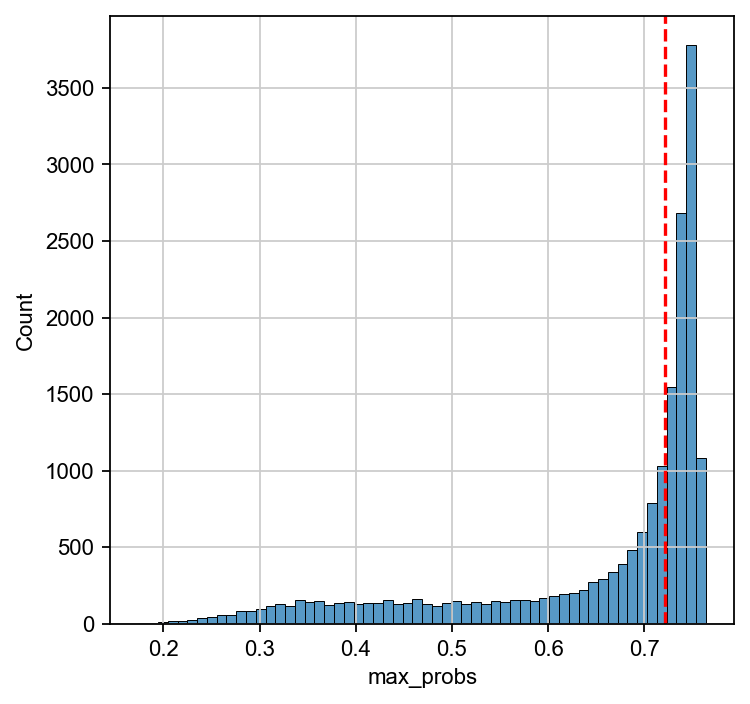

In [7]:
plt.figure(figsize=(5, 5)) 
sns.histplot(obs_sp['max_probs'])
plt.axvline(x=np.quantile(obs_sp['max_probs'], 0.50), color='red', linestyle='--')
plt.show()

In [8]:
#load embedding
hidden_list = STAMapper.load_hidden_states(folder_path/f'{best_model}'/'hidden_list.h5')
adt = sc.AnnData(hidden_list[-1]['cell'])
adt.obs['celltype'], adt.obs['predicted'], adt.obs['dataset'] = list(obs['celltype']), list(obs['predicted']), list(obs['dataset'])
sc.tl.pca(adt, svd_solver="arpack")
sc.pp.neighbors(adt, n_neighbors=10, n_pcs=40)
sc.tl.umap(adt)

adt_sc = adt[adt.obs['dataset'].isin([sc_name])]
adt_sp = adt[adt.obs['dataset'].isin([sp_name])]

dist_df= pipeline.ct_distace_df(key_class1, classes, adt_sc, adt_sp)

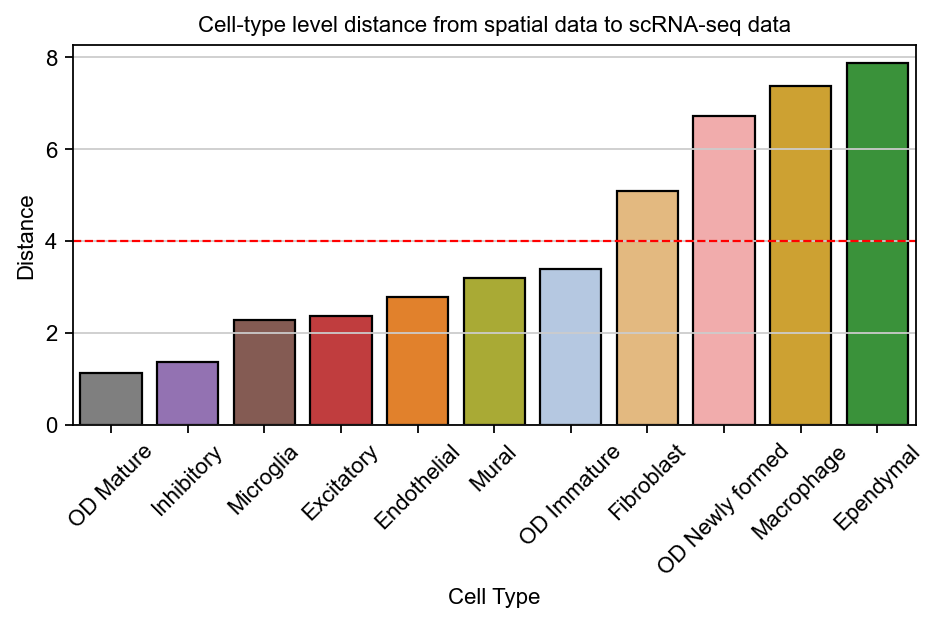

In [27]:
plt.figure(figsize=(6, 4)) 

palette = {'Astrocytes': '#1f77b4',
 'Inhibitory': '#9467bd',
 'Endothelial': '#ff7f0e',
 'Ependymal': '#2ca02c',
 'Excitatory': '#d62728',
 'Fibroblast': '#f3bb70',
 'Macrophage': '#e7ac18',
 'Microglia': '#8c564b',
 'Mural': '#bcbd22',
 'OD Immature': '#aec7e8',
 'OD Mature': '#7f7f7f',
 'OD Newly formed': '#fda1a0',
 'unknown':'#d2d1d1'}

threshold = 4#user defined parameter
sns.barplot(x='Cell Type', y='Distance', data=dist_df, palette=palette, linewidth=1, edgecolor='black')
plt.title('Cell-type level distance from spatial data to scRNA-seq data')
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
adt = pipeline.add_unknown_prediction(obs_sc, obs_sp, dist_df, adt, threshold=threshold)

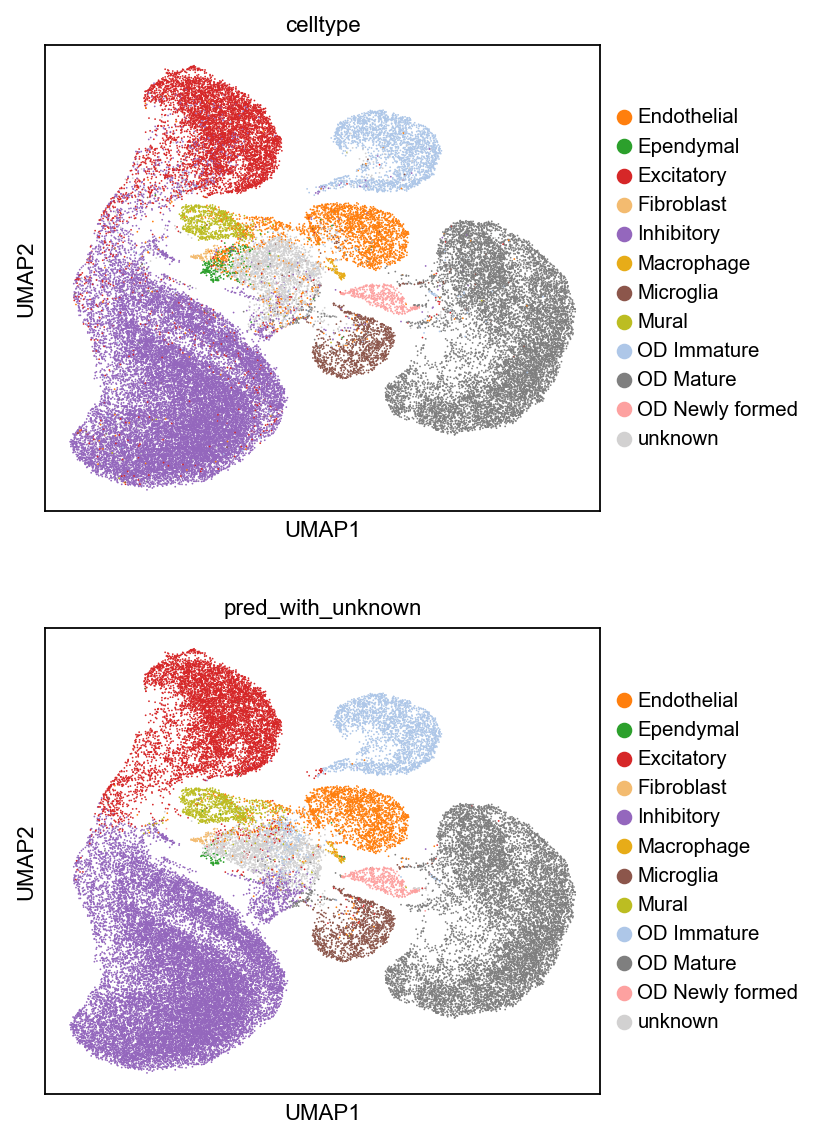

In [29]:
sc.pl.umap(adt, color=['celltype','pred_with_unknown'], palette=palette, ncols=1)

In [30]:
adt_sp = adt[adt.obs['dataset'].isin([sp_name])]
acc_with_unknown_detection = np.mean(np.array(adt_sp.obs['celltype'])==np.array((adt_sp.obs['pred_with_unknown'])))
print(f"Accuracy without unknown detection: {accuracy:.3f}, Accuracy with unknown detection: {acc_with_unknown_detection:.3f}")

Accuracy without unknown detection: 0.756, Accuracy with unknown detection: 0.824
